<a href="https://colab.research.google.com/github/LucaViolone/CV-Depth/blob/main/CLIP_Zero_Shot_Classification_Niche_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Project README — CLIP zero-shot anatomy classification

- Warning: images of neurosurgery
- **Note**: This is version two where I am taking a simplified approach and abandoning the gradient weighted class activation mapping (Grad CAM) plus saliency. Instead I just want to focus on evaluating the zero shot classification capabilities of CLIP in a specific domain. Previously I chose very difficult neurosurgical images, but this time I will have more identifiable structures and test if the model can classify aneurysm clips based on their characteristics. I chose this domain because it relates to what I want to work on for the semester project and I have had experience with it in the past.
- **Demo**: Images of different types of aneurysm clips are given, with their filenames serving as prompts (ex: 'fenestrated_long_clip'). The model will attempt to pair the proper images and text. Results will be evaluated analyzing what the model succeeded and struggled with.
- **How to run**: "Run All" the notebook.
- **Outputs**: Per image top-k label score
- **File**: `clip_zero_shot_anatomy_Luca_Violone.ipynb`.
- **References**:
  - CLIP (Radford et al., 2021) — https://arxiv.org/abs/2103.00020;
  - CLIP huggingface https://huggingface.co/openai/clip-vit-large-patch14
  - CLIP Repository https://github.com/openai/CLIP/blob/main/model-card.md
  - Article exploring general zero shot classification https://www.pinecone.io/learn/series/image-search/zero-shot-image-classification-clip/
  - Hugging face guide on zero shot classification (not CLIP) https://huggingface.co/docs/transformers/en/tasks/zero_shot_image_classification

### - LUCA VIOLONE


In [6]:
#aneurysm clip images # download dataset from shared google drive folder
!gdown --folder "https://drive.google.com/drive/folders/1AH0lRKgerjQiFLSUKoTQ8xnm_gvjbc6Z" -O /content/images

Retrieving folder contents
Processing file 1yNqhKWPAKZktJzURGGN5G_GFOTA2cw9v .DS_Store
Processing file 14TDYvyqwBEX_IhU4h9XzqOrL3rGGOms6 L_aneurysm_clip_long_slim.png
Processing file 13yZi0-AUv2ZtnU4lQSS76D7hGoGPY2QG Micro_aneurysm_clip_curved.jpg
Processing file 1vd0Vwy-uPf9mkJsIyGDoCi22YbR5QS6j short_fenestrated_clips.png
Processing file 11IISnzENBW-r_XVt8mIULvRgwNp_HBdy Straight_clip.jpeg
Processing file 1LU1-CoHhlK2Z4ug3Gs6DUt4K7h1OeEfk T_bar_aneurysm_clip_dual_bar_attached_to_loop.jpeg
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1yNqhKWPAKZktJzURGGN5G_GFOTA2cw9v
To: /content/images/.DS_Store
100% 6.15k/6.15k [00:00<00:00, 29.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=14TDYvyqwBEX_IhU4h9XzqOrL3rGGOms6
To: /content/images/L_aneurysm_clip_long_slim.png
100% 148k/148k [00:00<00:00, 93.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=13yZi0-AUv2ZtnU

In [7]:
!pip install -U transformers torch torchvision transformers pillow matplotlib tqdm

In [8]:
# from hugging face 'use this model'
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

In [9]:
# configuration
topk = 5  # how many guesses to keep
batch_size = 5  # how many images to process at once

In [10]:
#Extract images and labels

image_paths = [
    "/content/images/L_aneurysm_clip_long_slim.png",
    "/content/images/Micro_aneurysm_clip_curved.jpg",
    "/content/images/short_fenestrated_clips.png",
    "/content/images/Straight_clip.jpeg",
    "/content/images/T_bar_aneurysm_clip_dual_bar_attached_to_loop.jpeg"
]

labels = [
    "L aneurysm clip long slim",
    "Micro aneurysm clip curved",
    "short fenestrated clips",
    "Straight clip",
    "T bar aneurysm clip dual bar attached to loop"
]

prompts = [
    "A photo of a long slim L aneurysm clip",
    "A photo of a curved Micro aneurysm clip",
    "A photo of short fenestrated clips",
    "A photo of a Straight aneurysm clip",
    "A photo of a T bar aneurysm clip, dual bar attached to loo structure"
]

We make the raw labels into prompts because CLIP was trained on image text pairs and understands phrases with context better than bare keywords. By using a standard prompt template we can better evaluate CLIP's performance: If CLIP picks the matching prompt as top-1, it understood the visual features, but If it confuses prompts, we can see which descriptions are hard for it to separate (e.g., long vs short, straight vs curved).

In [11]:
#Loading CLIP

from transformers import pipeline
import torch

# pick GPU if available
device = 0 if torch.cuda.is_available() else -1

# load CLIP zero-shot pipeline
zeroshot = pipeline(
    task="zero-shot-image-classification",
    model="openai/clip-vit-large-patch14",
    device=device,
    use_fast=True
)

print("Using device:", "GPU" if device == 0 else "CPU")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Using device: GPU


Image: L_aneurysm_clip_long_slim.png


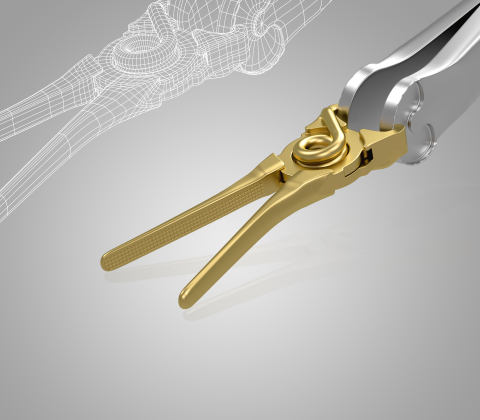

 True label: L aneurysm clip long slim
 Top predictions:
   1. A photo of a curved Micro aneurysm clip (score=0.484)
   2. A photo of short fenestrated clips (score=0.222)
   3. A photo of a Straight aneurysm clip (score=0.145)
   4. A photo of a long slim L aneurysm clip (score=0.139)
   5. A photo of a T bar aneurysm clip, dual bar attached to loo structure (score=0.011)

Image: Micro_aneurysm_clip_curved.jpg


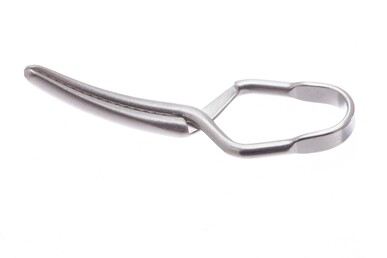

 True label: Micro aneurysm clip curved
 Top predictions:
   1. A photo of short fenestrated clips (score=0.351)
   2. A photo of a curved Micro aneurysm clip (score=0.319)
   3. A photo of a Straight aneurysm clip (score=0.225)
   4. A photo of a long slim L aneurysm clip (score=0.072)
   5. A photo of a T bar aneurysm clip, dual bar attached to loo structure (score=0.033)

Image: short_fenestrated_clips.png


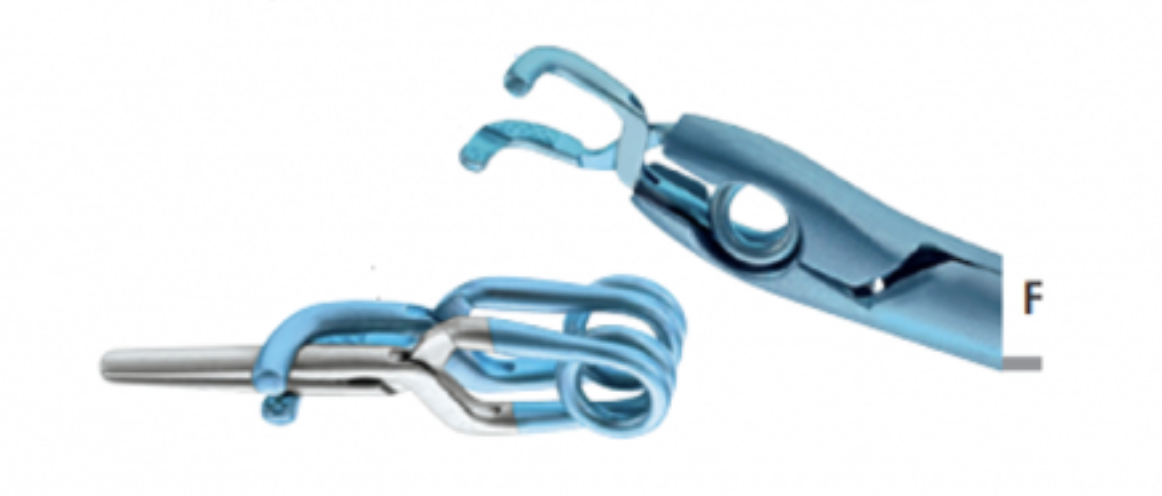

 True label: short fenestrated clips
 Top predictions:
   1. A photo of short fenestrated clips (score=0.838)
   2. A photo of a Straight aneurysm clip (score=0.086)
   3. A photo of a T bar aneurysm clip, dual bar attached to loo structure (score=0.031)
   4. A photo of a long slim L aneurysm clip (score=0.028)
   5. A photo of a curved Micro aneurysm clip (score=0.017)

Image: Straight_clip.jpeg


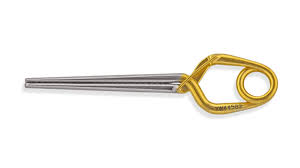

 True label: Straight clip
 Top predictions:
   1. A photo of a curved Micro aneurysm clip (score=0.346)
   2. A photo of a Straight aneurysm clip (score=0.291)
   3. A photo of short fenestrated clips (score=0.277)
   4. A photo of a long slim L aneurysm clip (score=0.082)
   5. A photo of a T bar aneurysm clip, dual bar attached to loo structure (score=0.004)

Image: T_bar_aneurysm_clip_dual_bar_attached_to_loop.jpeg


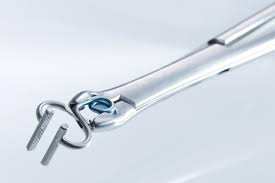

 True label: T bar aneurysm clip dual bar attached to loop
 Top predictions:
   1. A photo of a Straight aneurysm clip (score=0.307)
   2. A photo of short fenestrated clips (score=0.257)
   3. A photo of a long slim L aneurysm clip (score=0.255)
   4. A photo of a curved Micro aneurysm clip (score=0.129)
   5. A photo of a T bar aneurysm clip, dual bar attached to loo structure (score=0.052)

Top-1 accuracy: 1/5 = 0.20
Top-2 accuracy: 3/5 = 0.60


In [43]:
# running CLIP
from PIL import Image
from IPython.display import display # Import display

top_k = 5  # show 5 predictions
correct_top1 = 0
correct_top2 = 0  # credit only if correct in 1st or 2nd slot

for image_path, true_label in zip(image_paths, labels):
    # open the image
    image = Image.open(image_path).convert("RGB")

    # Display the image
    print(f"Image: {image_path.split('/')[-1]}")
    display(image) # Display the image

    # run CLIP with candidate prompts
    predictions = zeroshot(image, candidate_labels=prompts, hypothesis_template="{}") #hypothesis_template is like a prompt template

    # take top-k predictions
    top_predictions = predictions[:top_k]

    # check top-1 accuracy
    if top_predictions[0]["label"] == prompts[labels.index(true_label)]:
        correct_top1 += 1

    # check top-2 accuracy
    top2_labels = [p["label"] for p in top_predictions[:2]]
    if prompts[labels.index(true_label)] in top2_labels:
        correct_top2 += 1

    # print outputs
    print(f" True label: {true_label}")
    print(" Top predictions:")
    for i, prediction in enumerate(top_predictions, 1):
        print(f"   {i}. {prediction['label']} (score={prediction['score']:.3f})")
    print()

# final metrics
num_images = len(image_paths)
print(f"Top-1 accuracy: {correct_top1}/{num_images} = {correct_top1/num_images:.2f}")
print(f"Top-2 accuracy: {correct_top2}/{num_images} = {correct_top2/num_images:.2f}")

# Open each image.
# Ask CLIP to compare it against all prompts.
# Print the filename, the ground-truth label, and CLIP’s top-5 predictions with scores.
# Give credit only if the correct label is in the 1st or 2nd slot.

Example of prompt sensitivity

In [20]:
# prompt sensitivity test for a single image

# choose one image
image_path = image_paths[0]
image = Image.open(image_path).convert("RGB")

# two slightly different phrasings for the same concept
test_prompts = [
    "a photo of a straight aneurysm clip",
    "an image of a straight clip"
]

# run CLIP
predictions = zeroshot(image, candidate_labels=test_prompts, hypothesis_template="{}")

# print results
print(f"Image: {image_path.split('/')[-1]}")
print("Prompt sensitivity test:")
for rank, pred in enumerate(predictions, start=1):
    print(f" {rank}. {pred['label']} (score={pred['score']:.3f})")

# Commentary:
# CLIP can be prompt-sensitive. Small wording changes may shift which prompt
# scores highest, revealing how it interprets text context.


Image: L_aneurysm_clip_long_slim.png
Prompt sensitivity test:
 1. an image of a straight clip (score=0.790)
 2. a photo of a straight aneurysm clip (score=0.210)


Showing how these prompt embeddings change with this simple wording difference

In [37]:
#show how above prompts vary in the embedding space
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import torch

#setup model and processor
torch_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "openai/clip-vit-large-patch14"
clip_model = CLIPModel.from_pretrained(model_name).to(torch_device).eval()
clip_processor = CLIPProcessor.from_pretrained(model_name)

#set prompts
test_prompts = [
    "a photo of a straight aneurysm clip",
    "an image of a straight clip",
    "a photo of a scalpel",
    "A photo of a long slim L aneurysm clip",
    "A photo of a curved Micro aneurysm clip",
    "A photo of short fenestrated clips",
    "A photo of a T bar aneurysm clip, dual bar attached to loo structure"
 ]

#tokenize prompts (turning strings into tensors the CLIP text encoder can read)
torch_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_inputs = clip_processor(
    text=test_prompts,
    return_tensors="pt",
    padding=True)   # remove .to(device) which was causing errors
text_inputs = {k: v.to(torch_device) for k, v in text_inputs.items()}

#runs the processed text through CLIPs encoder, returns one embedding vector per prompt
with torch.no_grad():
    text_features = clip_model.get_text_features(**text_inputs) #shape = [N,D] n -- prompts passed, d -- embedding dimension for cosine similarity
    #After normalization the dot product between two embeddings equals their cosine similarity.
    #This removes effects of vector magnitude and compares direction only matching CLIP’s contrastive training.

#comparing text features
text_features = text_features / text_features.norm(dim=-1, keepdim=True) #L2-normalizes each row (each prompt vector) so every embedding has length 1. Shape: [N, D]

#Convert from PyTorch tensor to NumPy array on CPU.
# .detach(): drop gradient tracking (we're only visualizing).
# .cpu(): move from GPU to CPU memory.
# .numpy(): turn tensor into a NumPy array for scikit-learn.
features_np = text_features.detach().cpu().numpy()  # shape [N, D]

# Reduce D dimensions down to 2 with PCA so we can plot points.
# n_components=2: keep only two axes (PC1, PC2).
# random_state=3: make the projection reproducible run-to-run.
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=3)
coords = pca.fit_transform(features_np)  # shape [N, 2]; N = number of prompts

In [42]:
# Plot the 2D PCA-reduced embeddings using Plotly
import plotly.express as px
import pandas as pd

# Create a pandas DataFrame for Plotly
df = pd.DataFrame(coords, columns=['PC1', 'PC2'])
df['Prompt'] = test_prompts

# Create the scatter plot
fig = px.scatter(df, x='PC1', y='PC2', text='Prompt')

# Update layout for better readability
fig.update_traces(textposition='top center')
fig.update_layout(
    title='CLIP text embeddings (PCA of prompt variants)',
    xaxis_title='PC1',
    yaxis_title='PC2'
)

# Show the plot
fig.show()

Overview of Embedding process:

Each token ID is mapped to a learned vector like a word embedding. So now you have a sequence of vectors, each 512–1024 dimensions long depending on model size.

Transformer encoder
This sequence passes through multiple Transformer layers (self-attention + feedforward). The encoder lets each token modify the others so the model can capture context (ex: “straight” modifies “clip”).

Pooling
CLIP takes the end-of-text token embedding as the final sentence representation.

Projection
That pooled vector is then mapped into the joint embedding space where images also live.

Normalization
You usually L2-normalize the vector so you can compare it with other embeddings using cosine similarity. Cosine similarity is a way to measure how close two vectors are by comparing their direction. We want to know if an image and a prompt are pointing in the same direction (same meaning).

Model result discussion:
Generally the model struggled to classify the intricate clips based on their short descriptions which is to be expected, however the model was still able to classify the correct image/text pair within its top 2 guesses 3/5 times (%60). By plotting the embeddings of the text, it seems as though the context of the word 'aneurysm' is important for the grouping of the embedding. This experiment shows that CLIP has potential to be adapted to niche domains, but would need additional fine-tuning.


Implications of a (working) system like this:
- It would need finetuning, but with available data like surgical video transcripts/annotations or some labeled data possibly from catalouges this could be an option for niche domain classification.
- A use case for a working CLIP classification model could be labeling lots of data to train models for what type of clip to use, possibly by combining what clip was selected based on preoperative imaging and the success of the surgery
